# Figure 13: Effectiveness on the number of sampled points m

Run the following code and wait for the "finish" prompt to appear to get the experimental results.

finish


C:\Users\admin\AppData\Local\Temp\ipykernel_25532\3433858771.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  om3_ssim[len(om3_ssim)-2]=m4_ssim[len(m4_ssim)-2]
C:\Users\admin\AppData\Local\Temp\ipykernel_25532\3433858771.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  om3_ssim[len(om3_ssim)-2]=m4_ssim[len(m4_ssim)-2]
C:\Users\admin\AppData\Local\Temp\ipykernel_25532\3433858771.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

29031

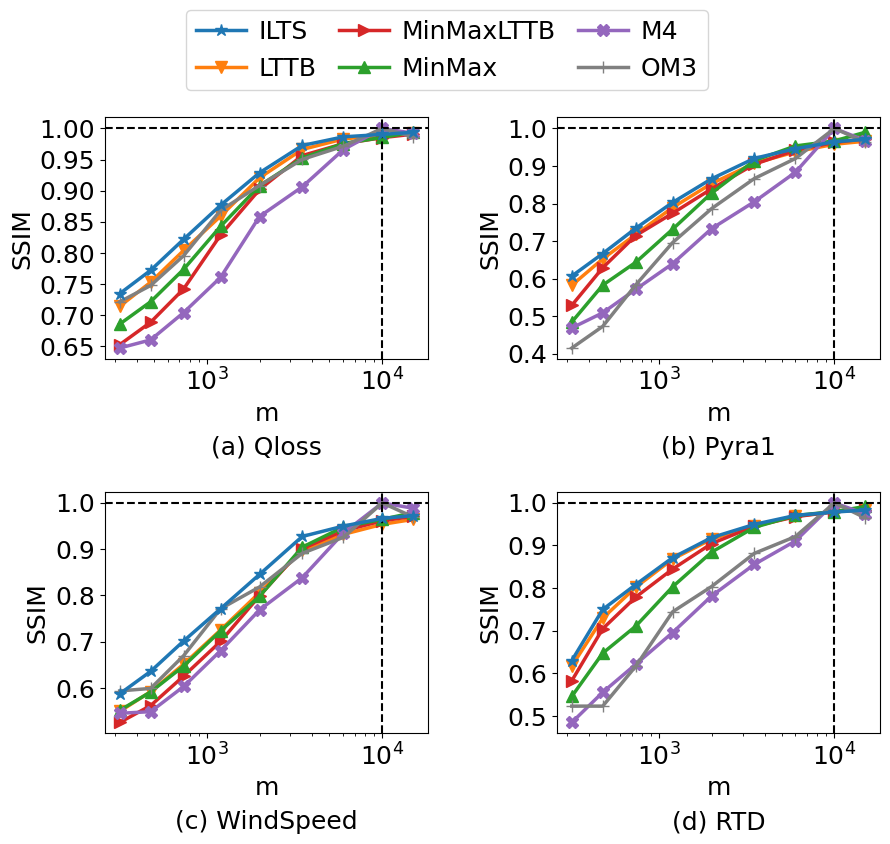

In [2]:
from myfuncs import *

fig, axs = plt.subplots(2,2,figsize=(10,8))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
axes=[ax1,ax2,ax3,ax4]

titlepos=-0.43

font=18
lw=2.5
slw=1
ms=9
columnspacing=0.9
handletextpad=0.5

# Remove space between axes
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.55)

ssimDir="./ssimResults-vary-m" 
resList=[]
resList.append(os.path.join(ssimDir,'res-Qloss.csv'))
resList.append(os.path.join(ssimDir,'res-Pyra1.csv'))
resList.append(os.path.join(ssimDir,'res-WindSpeed.csv'))
resList.append(os.path.join(ssimDir,'res-RTD.csv'))


titleList=[
    '(a) Qloss',
    '(b) Pyra1',
    '(c) WindSpeed',
    '(d) RTD'
]

use_n=True
segment_use_n=False
for i in range(len(resList)):
    plt.sca(axes[i])
    
    col_list = ["nout",\
                "lttb_n","lttb_ssim",\
                "ilts_n","ilts_ssim",\
                "minmaxlttb_n","minmaxlttb_ssim",\
                "minmax_n","minmax_ssim",\
                "m4_n","m4_ssim",\
                "om3_n","om3_ssim",\
           ]
    
    df=pd.read_csv(resList[i],header=0,names=col_list)
    colIdx=-1
    
    colIdx+=1
    n=df.iloc[:,colIdx]
    
    colIdx+=1
    lttb_n=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    lttb_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    ilts_n=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    ilts_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    minmaxlttb_n=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    minmaxlttb_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    minmax_n=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    minmax_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    m4_n=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    m4_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    om3_m=df.iloc[:,colIdx] if not use_n else n
    colIdx+=1
    om3_ssim=df.iloc[:,colIdx]
        
    plt.plot(ilts_n,ilts_ssim,marker=markersmap.get('ILTS'),markersize=ms,linewidth=lw,color=colorsmap.get('ILTS'),zorder=1000)
    plt.plot(lttb_n,lttb_ssim,marker=markersmap.get('LTTB'),markersize=ms,linewidth=lw,color=colorsmap.get('LTTB'))
    plt.plot(minmaxlttb_n,minmaxlttb_ssim,marker=markersmap.get('MinMaxLTTB'),markersize=ms,linewidth=lw,\
             color=colorsmap.get('MinMaxLTTB'))
    
    plt.plot(minmax_n,minmax_ssim,marker=markersmap.get('MinMax'),markersize=ms,linewidth=lw,color=colorsmap.get('MinMax'))
    plt.plot(m4_n,m4_ssim,marker=markersmap.get('M4'),markersize=ms,linewidth=lw,color=colorsmap.get('M4'))
    
    # At the moment when m=4w, OM3 should theoretically achieve the same SSIM=1 as M4. 
    # However, since OM3's visualization client only provides a drag-and-drop interface for adjusting the time range, 
    # it cannot precisely control the visualization time range. Therefore, at m=4w, we assigned OM3 a theoretical SSIM=1.
    om3_ssim[len(om3_ssim)-2]=m4_ssim[len(m4_ssim)-2]
        
    plt.plot(om3_m,om3_ssim,marker=markersmap.get('OM3'),markersize=ms,linewidth=lw,color=colorsmap.get('OM3')) # OM3 TODO

    plt.xlabel("m",fontsize=font)
    plt.ylabel("SSIM", fontsize=font)

    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xscale('log')

    width=2500
    plt.axvline(x=4*width,linestyle="--",color="k")
    plt.axhline(y=1,linestyle="--",color="k")


    plt.title(titleList[i],y=titlepos,fontsize=font)
    
labels=["ILTS","LTTB","MinMaxLTTB","MinMax","M4","OM3"]
fig.legend(fontsize=font, labels=labels, ncol=3,bbox_to_anchor=(0.467,1.03), loc='upper center',\
           columnspacing=columnspacing,handletextpad=handletextpad)
fig.show()

print('finish')
gc.collect()

`ssimDir="./ssimResults-vary-m" ` result files in the above code come from the following code, 
and you can run the following code to generate these files from scratch.
This will take some time to complete, please be patient:

In [ ]:
from myfuncs import *
import re
import os 
import gc

plt.rcParams['agg.path.chunksize'] = 20000

ssimDir="./ssimResults-vary-m" 
if not os.path.exists(ssimDir):
    os.makedirs(ssimDir)
resList=[]
resList.append(os.path.join(ssimDir,'res-Qloss.csv'))
resList.append(os.path.join(ssimDir,'res-Pyra1.csv'))
resList.append(os.path.join(ssimDir,'res-WindSpeed.csv'))
resList.append(os.path.join(ssimDir,'res-RTD.csv'))


om3TableDir="om3Tables"
pattern=r"om3-{dataset}-{m}.csv"
def get_first_matched_file(folder_path,pattern):
    pattern = re.compile(pattern)
    files = os.listdir(folder_path)
    matched_files = [file for file in files if pattern.match(file)]
    if matched_files:
        return os.path.join(folder_path,matched_files[0])
    else:
        return None

dataDir="../datasets"
d1=os.path.join(dataDir,"Qloss.csv")
d2=os.path.join(dataDir,"Pyra1.csv")
d3=os.path.join(dataDir,"WindSpeed.csv")
d4=os.path.join(dataDir,"RTD.csv")
print('make sure you downloaded the datasets')

dList=[d1,d2,d3,d4]

datasetNames=[
    'Qloss',
    'Pyra1',
    'WindSpeed',
    'RTD'
]

pngDir="./tmp" # after finish experiments, the figures in pngDir can be deleted
if not os.path.exists(pngDir):
    os.makedirs(pngDir)
    
anti=False
lw=0.7
width=2500
height=1500
dpi=72

# different datasets have different scales of details
smallWS=7
largeWS=17
ws=[largeWS,smallWS,smallWS,largeWS]
    
for i in range(len(dList)):
    filename = dList[i]
    df=pd.read_csv(filename,header=None) # default no header
    v=df.iloc[:,1]
    v=v.to_numpy(dtype='float')
    t=np.arange(0,len(v))
    
    noutArray=[320,480,740,1200,2000,3500,6000,10000,15000]
    
    res=resList[i]
    with open(res, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["nout",\
                "lttb_n","lttb_ssim",\
                "ilts_n","ilts_ssim",\
                "minmaxlttb_n","minmaxlttb_ssim",\
                "minmax_n","minmax_ssim",\
                "m4_n","m4_ssim",\
                "om3_n","om3_ssim"
        ])


        for j in range(len(noutArray)):
            nout=noutArray[j]

            row=[nout]

            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'original'
            downsample='original'
            subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            originPNG=os.path.join(pngDir,name+'.png')
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'LTTBETDownsampler' 
            downsample='LTTBETDownsampler'
            t2,v2=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t2))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'LTTBETFurtherDownsampler' 
            downsample='LTTBETFurtherDownsampler'
            t3,v3=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t3))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'MinMaxLTTB2Downsampler'
            downsample='MinMaxLTTB2Downsampler'
            t4,v4,t4_pre,v4_pre=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,\
                                                       isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t4))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'MinMaxDownsampler'
            downsample='MinMaxDownsampler'
            t5,v5=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t5))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'M4Downsampler'
            downsample='M4Downsampler'
            t6,v6=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False,\
                                        transform=True) # for M4 relies on bresenham rasterization
            f2=os.path.join(pngDir,name+'.png')
        
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'original_floored'
            downsample='original'
            subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False,\
                                   transform=True) # for M4 relies on bresenham rasterization
            f1=os.path.join(pngDir,name+'.png')
            
            row.append(len(t6))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            query_table_csv=get_first_matched_file(om3TableDir,pattern.format(dataset=datasetNames[i].lower(),m=nout))
            print(query_table_csv)
            om3_v=OM3_reverse(query_table_csv,len(t))
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(width)+'_'+'OM3'
            downsample='OM3'
            t7,v7=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False,\
                                        om3_v=om3_v)
            f2=os.path.join(pngDir,name+'.png')

            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'original_sorted'
            downsample='original'
            v_sorted=sortRaw(filename) # mimic flag order
            subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v_sorted,pngDir=pngDir,isPlot=False) 
            f1=os.path.join(pngDir,name+'.png')
            
            row.append(len(t7))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()
            
           
            writer.writerow(row)
            f.flush()
            

    plt.tight_layout()
    plt.show()
    
import shutil
if os.path.exists(pngDir):
    shutil.rmtree(pngDir)
    
print('finish')
gc.collect()